# XGBoost分类的代码实现

XGB00st默认会实现回归算法，因此在执行分类的时候，我们需要主动声明算法的类型。xgb00st是通过当前算法所使用的损失函数来判断任务类型的，即是通过在params中填写的objective参数来判断任务类型。当不再执行回归任务时，模型的评估指标也会发生变化，因此xgboost分类所需要的参数会更多。objective参数中可以输入数十种不同的选项，常见的有：

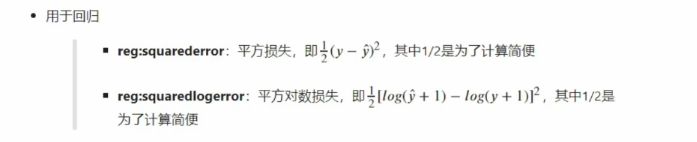

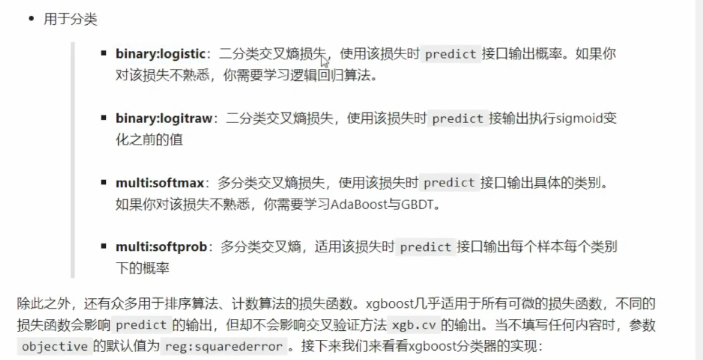

In [1]:
import xgboost as xgb

* 导入数据

In [3]:
# 导入2个最简单的分类数据集：乳腺癌数据集与手写数字数据集
from sklearn.datasets import  load_breast_cancer, load_digits

# 二分类数据
X_binary = load_breast_cancer().data
y_binary = load_breast_cancer().target
data_binary = xgb.DMatrix(X_binary, label=y_binary)

# 多分类数据
X_multi = load_digits().data
y_multi = load_digits().target
data_multi = xgb.DMatrix(X_multi, label=y_multi)

* 设置params,进行训练

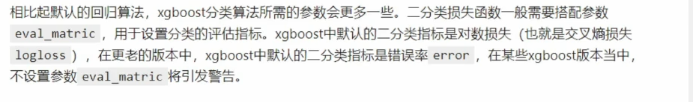

In [4]:
params1 = {
    "seed":1412,
    "objective":"binary:logistic",
    "eval_metric":"logloss"
}

clf_binary = xgb.train(params1, data_binary, num_boost_round=100)

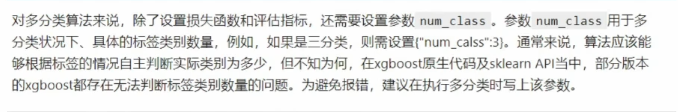

In [5]:
params2 = {
    "seed":1412,
    "objective":"multi:softmax",
    "eval_metric":"mlogloss",
    "num_class":10
}

clf_multi = xgb.train(params2, data_multi, num_boost_round=100)

* 预测与评估

In [6]:
y_pred_binary = clf_binary.predict(data_binary)
y_pred_multi = clf_multi.predict(data_multi)

In [7]:
y_pred_binary[:20]

array([5.9830486e-03, 1.0785054e-03, 2.8278260e-04, 1.7240757e-02,
       8.8689197e-03, 2.0348135e-02, 8.1676582e-05, 4.3557968e-04,
       1.5153858e-03, 5.1954496e-03, 1.1665462e-02, 3.4424273e-04,
       7.8352279e-04, 6.0624103e-03, 1.3893890e-02, 4.8467741e-04,
       9.8429613e-05, 1.8938415e-04, 1.3668074e-04, 9.9775141e-01],
      dtype=float32)

In [8]:
y_pred_multi

array([0., 1., 2., ..., 8., 9., 8.], dtype=float32)

In [9]:
from sklearn.metrics import accuracy_score as acc   # 当返回具体类别时，可以使用准确率
from sklearn.metrics import log_loss as logloss     # 当返回概率时，则必须使用交叉熵损失

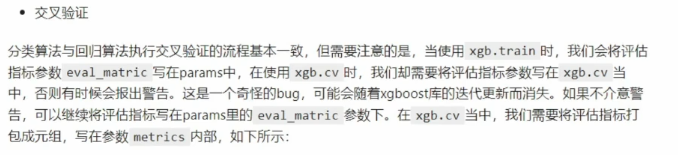

In [10]:
params2 = {
    "seed":1412,
    "objective":"multi:softprob",
    "eval_metric":"mlogloss",
    "num_class":10
}

result = xgb.cv(params2, data_multi, num_boost_round=100, nfold=5, metrics="mlogloss", seed=1412)

In [11]:
result

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,1.228912,0.006192,1.329258,0.040182
1,0.869281,0.005974,1.008202,0.047487
2,0.642709,0.005521,0.804957,0.050978
3,0.484223,0.004590,0.658109,0.049978
4,0.370332,0.004205,0.552544,0.049256
...,...,...,...,...
95,0.003921,0.000027,0.118135,0.028020
96,0.003908,0.000026,0.118038,0.027948
97,0.003896,0.000026,0.118104,0.027992
98,0.003885,0.000026,0.118006,0.027957


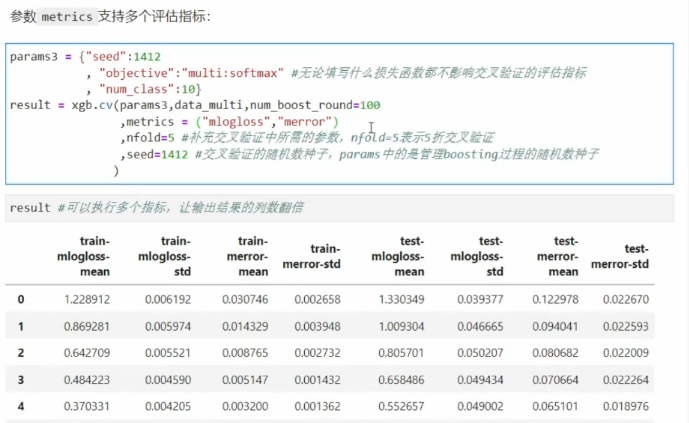

* sklearn API的实现

In [12]:
from xgboost import XGBClassifier

由于在sklearn API当中，我们明确了正在执行的任务是分类，因此无需再使用损失函数来帮助我们辨别分类的类型了。然而如果是多分类，建议还是在参数中明确所使用的损失函数：

In [13]:
clf = XGBClassifier(n_estimators=100, 
                    objective="multi:softmax", 
                    num_class=10, 
                    seed=1412,
                    eval_metric="mlogloss")

In [14]:
clf = clf.fit(X_multi, y_multi)

In [15]:
clf.predict(X_multi)

array([0, 1, 2, ..., 8, 9, 8])